<a href="https://colab.research.google.com/github/ali-unlu/EDA-Car-Dataset/blob/main/EDA_with_Car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Automobile Dataset

In this analysis, I will  demonstrate how to explore the cars.csv dataset using Python. I will first load the dataset and then process the data. I will also be visualizing the dataset and then finally apply ttest to explore the relationship between variables. When the final dataset is prepared, the same dataset can be used to develop various models. 

Data could be reached from [Kaggle with this link](https://www.kaggle.com/ljanjughazyan/cars1)

In [ ]:
# required packages
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [ ]:
# data
df = pd.read_csv('CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [ ]:
# dimension of the df
print(df.shape)

# data types
print(df.dtypes)

(428, 15)
Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object


We have now 428 rows and 15 columns.  While 7 of the variables are characters, the rest are integer or float but MSRP and invoice columns were set to characters, which need to convert into integer. Car price is our outcome or target variable and the rest will be used as the predictors of car price. 

# Data processing

Since car price, __MSRP__ , is our target variable and it is in __chr__ format, we need to first convert it to integers. Nevertheless, price has __$__ and __(,)__ signs, we first need to remove those and then convert it to real numbers.

In [ ]:
df['MSRP']= df.MSRP.apply(lambda x: x.replace('$', ''))
df['MSRP']= df.MSRP.apply(lambda x: x.replace(',', ''))

In [ ]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')
df['MSRP'].head()

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: int64

After converting price into numbers, we need to check the outliers of price since we use ttest to compare different groups. If there are some outliners in prices, it will affect  our results because ttest is mainly based on mean comparison. In that situation, an outlier will affect the groups mean. So, we will use normalization procedure. 

<AxesSubplot:xlabel='MSRP'>

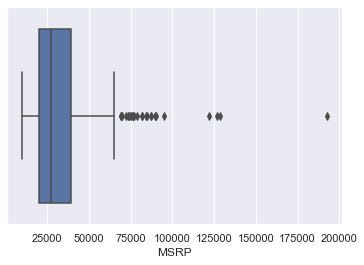

In [ ]:
#Check the distribution
sns.boxplot(x=df['MSRP'])

In [ ]:
# let's see what kind of cars have extreme prices
outliers = df[(df.MSRP > 75000)]
print('Number of the cars in outlier list: ', len(outliers))

print(outliers[['Make', 'Model', 'MSRP']])


Number of the cars in outlier list:  17
              Make                                Model    MSRP
6            Acura               NSX coupe 2dr manual S   89765
20            Audi                             RS 6 4dr   84600
61        Cadillac                  XLR convertible 2dr   76200
114          Dodge         Viper SRT-10 convertible 2dr   81795
199         Jaguar                        XKR coupe 2dr   81995
200         Jaguar                  XKR convertible 2dr   86995
251  Mercedes-Benz                                 G500   76870
261  Mercedes-Benz                            CL500 2dr   94820
262  Mercedes-Benz                            CL600 2dr  128420
268  Mercedes-Benz                             S500 4dr   86970
269  Mercedes-Benz                SL500 convertible 2dr   90520
270  Mercedes-Benz                         SL55 AMG 2dr  121770
271  Mercedes-Benz                SL600 convertible 2dr  126670
331        Porsche  911 Carrera convertible 2dr (coupe)   79165


In our data set, there are 17 cars can be categorized as outliers and all these cars in in luxury category. Depending on the research aims, these can be kept as is in the dataset but since we will make ttest, these cars absoulately affect our result, so we will remove them. 

### Outliers

As seen above, there are few prices that are outliers. To normalize our outcome variable, I will use interquartile range technique.

__According to Wikipedia:__ The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSRP           18870.750
EngineSize         1.525
Cylinders          2.000
Horsepower        90.000
MPG_City           4.250
MPG_Highway        5.000
Weight           873.750
Wheelbase          9.000
Length            16.000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\aunc\AppData\Local\Temp/ipykernel_3960/2227700030.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:xlabel='MSRP'>

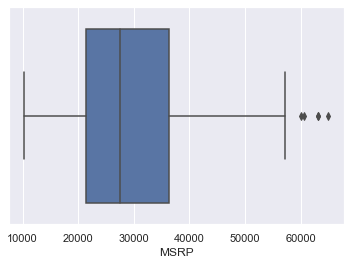

In [ ]:
# re-checked the distribution
sns.boxplot(x=df['MSRP'])

After using the technique now as seen below the MSRP box plot contains no outlier points this is a big improvement. Previously there were over 15 points of outliers now I have removed those outliers

In [ ]:

df['Invoice']= df.Invoice.apply(lambda x: x.replace('$', ''))
df['Invoice']= df.Invoice.apply(lambda x: x.replace(',', ''))


In [ ]:
df['Invoice']=pd.to_numeric(df['Invoice'],errors='coerce')
df['Invoice']

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 341, dtype: int64

 I also test the Robust scaleer function to the target variable to see how it affects its distribution. The process converts the values between -1 to +2.5 values and it can be used if the model will be used for ML models but since we will make a ttest, this process does not fit well to our model. I kept the data as processed above. This codes are only for my future references. 

In [ ]:

from sklearn import preprocessing
robust_scaler = preprocessing.RobustScaler()

column_names_to_normalize = ['MSRP', 'Invoice']
x = df[column_names_to_normalize].values

# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = robust_scaler.fit_transform(x)


df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp




In [ ]:
# re-checked 
#Check the distribution
sns.boxplot(x=df['MSRP'])

In [ ]:
# summary of the df
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,341.000000,341.000000,341.000000,339.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,29789.439883,27332.146628,3.106158,5.684366,210.513196,19.624633,26.618768,3543.299120,107.803519,186.304985
std,11048.748802,9961.342314,0.890269,1.320332,54.939839,2.928538,3.834994,562.054298,5.905091,11.652099
min,10280.000000,9875.000000,1.300000,4.000000,104.000000,13.000000,17.000000,2403.000000,95.000000,158.000000
25%,21445.000000,19801.000000,2.400000,4.000000,170.000000,18.000000,25.000000,3188.000000,104.000000,178.000000
50%,27560.000000,25218.000000,3.000000,6.000000,208.000000,19.000000,26.000000,3470.000000,107.000000,187.000000
75%,36395.000000,33129.000000,3.500000,6.000000,240.000000,21.000000,29.000000,3851.000000,112.000000,193.000000
max,65000.000000,59912.000000,5.700000,8.000000,390.000000,27.000000,36.000000,5270.000000,124.000000,215.000000


Interestingle enough that the data has few missing variables. It seems only cylinders column has two missing variables. We can replace missing value with median. 

In [ ]:
# remove dublicates
df = df.drop_duplicates(subset='MSRP', keep='first')
df.count()


Make           327
Model          327
Type           327
Origin         327
DriveTrain     327
MSRP           327
Invoice        327
EngineSize     327
Cylinders      325
Horsepower     327
MPG_City       327
MPG_Highway    327
Weight         327
Wheelbase      327
Length         327
dtype: int64

In [ ]:
# replace missing with median because it is a cyclinder

df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].median())
df.count()


Make           327
Model          327
Type           327
Origin         327
DriveTrain     327
MSRP           327
Invoice        327
EngineSize     327
Cylinders      327
Horsepower     327
MPG_City       327
MPG_Highway    327
Weight         327
Wheelbase      327
Length         327
dtype: int64

# Plots

We can look at how many different cars companies have with bar plot. I will include the top 40 companies according to their repository. 

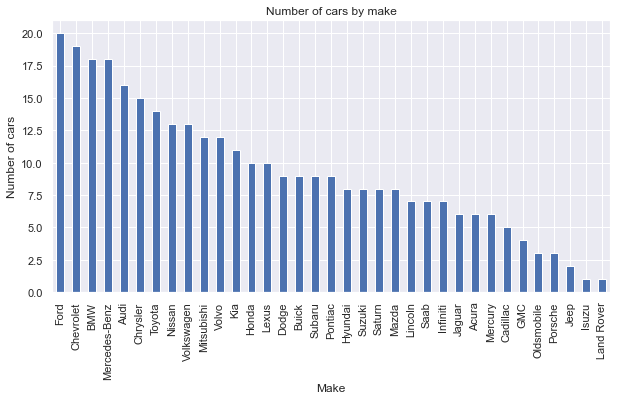

In [ ]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

We can first look at the correlation between horsepower and price

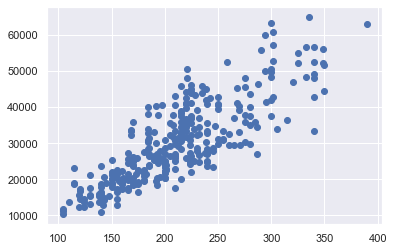

In [ ]:
ax= plt.axes()
ax.scatter(df.Horsepower, df.MSRP)

<AxesSubplot:>

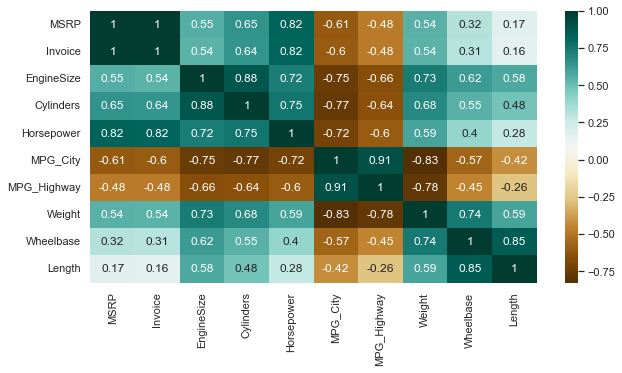

In [ ]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Hypothesis 

## 1 T test

The two sample t-test is also known as the independent samples, independent, and unpaired t-test. Moreover, this type of statistical test compares two averages (means) and will give you information if these two means are statistically different from each other. The t-test also tells you whether the differences are statistically significant. In other words it lets you know if those differences could have happened by chance.

Now, when performing t-tests you typically have the following two hypotheses:

    Null hypotheses: Two group means are equal
    Alternative hypotheses: Two group means are different (two-tailed)

- Ho: µ EU cars == µ US cars
- Ha: µ EU cars != µ US cars

In [ ]:
# Subset data
EU_cars = df.query('Origin == "Asia"')['MSRP']
US_cars = df.query('Origin == "USA"')['MSRP']


In [ ]:
from scipy import stats
rng = np.random.default_rng()

In [ ]:
res = stats.ttest_ind(EU_cars, US_cars, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=-1.1743283738395427, pvalue=0.2414727243778856)

__Conclusion:__ Our results show that the difference between EU cars and USA cars is not statistically significant.  It is safe to say that we fail to reject null hypotesis. Although there seems to be a difference on the grapgh, this variation is not statistically significant.  I also checked the results without removing outliers and the outliers affect this test and suggest that EU cars are expensive, as explained above.

<AxesSubplot:xlabel='Origin', ylabel='MSRP'>

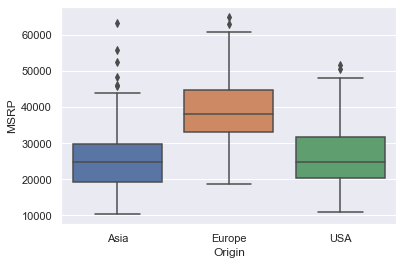

In [ ]:
# Box plot for the origins of cars
sns.boxplot(x= 'Origin', y='MSRP',  data= df)

## Hypothesis 2

The second hypothesis is based on the assumption that rear drive cars are expensive than front drive cars. 

Ho: µ Rear drive car == µ Front drive car  
Ha: µ Rear drive train car != µ Front drive car

In [ ]:
# Subset data
rear = df.query('DriveTrain == "Rear"')['MSRP']
front = df.query('DriveTrain == "Front"')['MSRP']



In [ ]:
res1 = stats.ttest_ind(rear, front,  random_state=rng,
                      equal_var=True)

display(res1)

Ttest_indResult(statistic=8.693002196121649, pvalue=4.2414353450674266e-16)

__Results:__  Our test results show that p value of the analysis is statistically significant, which means that we reject the null hypothesis. As shown below, the price of rear drive cars expensive because it is known that most of the sport adn luxury cars have rear drive. 

<AxesSubplot:xlabel='DriveTrain', ylabel='MSRP'>

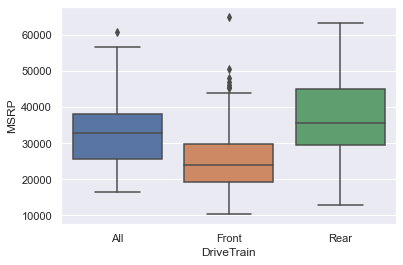

In [ ]:
# df.DriveTrain.value_counts()
sns.boxplot(x= 'DriveTrain', y= 'MSRP', data= df)

## Hypothesis 3

Let's finally check out whether the price of Ford cars are expensive than  Toyota cars. 

Ho: µ Ford == µ Toyota  
Ha: µ Ford != µ Toyota



In [ ]:
# Subset data
ford = df.query('Make == "Ford"')['MSRP']
toyota = df.query('Make == "Toyota"')['MSRP']

In [ ]:
res2 = stats.ttest_ind(rear, front, 
                      equal_var=True)

display(res2)

Ttest_indResult(statistic=8.693002196121649, pvalue=4.2414353450674266e-16)

__Results:__ Analysis results show that the price of two car companies in our data set is also statistically significant. The p value indicates that we reject the null hypothesis. The difference can be seen below. Since we introduced the Ford first, the outout is -8.693002196121649, which means that Ford cars are that much cheaper than Toyota on average. 

<AxesSubplot:xlabel='Make', ylabel='MSRP'>

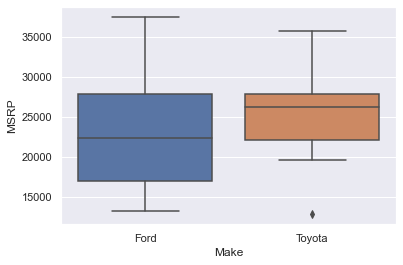

In [ ]:
cars = ['Ford', 'Toyota']
df2= df[df.Make.isin(cars)]


df2.head()

sns.boxplot(x= 'Make', y= 'MSRP', data= df2)

# Conclusion

In this post, I illustrated how to make an EDA analysis for car dataset and how to create hypothesis testing models.

Briefly:
1. I converted __chr__ format variables into numbers. To do so, I first removed some chacracters from the data and then changed the data type.
2. I replaced missing variable with the set median. 
3. I identified outliers and then remove some of them. I also prepared some codes for data normalization procedure. 
4. I created three graphs about the dataset. 
5. I created three hypothesis testing models and used ttest to compare groups means. 
6. I also created boxplots to show the ttest results in context. 

# Further steps

The data is now ready for machine learning models. Before using them directly, we will apply normalization procedure as examplified above, including all variables.

Moreover, all categorical variables need to be converted to dummy variables. 





__Thanks for your visit and reading!__